In [2]:
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from collections import Counter

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRFClassifier

from imblearn.over_sampling import SMOTE

In [3]:
dtrain =pd.read_csv("D:/ml/xgboost-main/data/android_malware/TUANDROMD.csv")
dtrain.head()

,ACCESS_ALL_DOWNLOADS,ACCESS_CACHE_FILESYSTEM,ACCESS_CHECKIN_PROPERTIES,ACCESS_COARSE_LOCATION,ACCESS_COARSE_UPDATES,ACCESS_FINE_LOCATION,ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_MOCK_LOCATION,ACCESS_MTK_MMHW,ACCESS_NETWORK_STATE,...,Landroid/telephony/TelephonyManager;->getLine1Number,Landroid/telephony/TelephonyManager;->getNetworkOperator,Landroid/telephony/TelephonyManager;->getNetworkOperatorName,Landroid/telephony/TelephonyManager;->getNetworkCountryIso,Landroid/telephony/TelephonyManager;->getSimOperator,Landroid/telephony/TelephonyManager;->getSimOperatorName,Landroid/telephony/TelephonyManager;->getSimCountryIso,Landroid/telephony/TelephonyManager;->getSimSerialNumber,Lorg/apache/http/impl/client/DefaultHttpClient;->execute,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,malware
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,malware
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,malware
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,malware
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,malware


In [4]:
dtrain = dtrain.fillna(0)       #zamiana null na 0
dtrain.dtypes

ACCESS_ALL_DOWNLOADS                                        float64
ACCESS_CACHE_FILESYSTEM                                     float64
ACCESS_CHECKIN_PROPERTIES                                   float64
ACCESS_COARSE_LOCATION                                      float64
ACCESS_COARSE_UPDATES                                       float64
                                                             ...   
Landroid/telephony/TelephonyManager;->getSimOperatorName    float64
Landroid/telephony/TelephonyManager;->getSimCountryIso      float64
Landroid/telephony/TelephonyManager;->getSimSerialNumber    float64
Lorg/apache/http/impl/client/DefaultHttpClient;->execute    float64
Label                                                        object
Length: 242, dtype: object

In [5]:
label = {'malware':1,'goodware':0}      #zamina tekstu w excel na wartosci 0 i 1
dtrain2 = dtrain.replace(label)
dtrain2[dtrain2.select_dtypes(include=['float64']).columns] = dtrain2.select_dtypes(include=['float64']).astype('int64')
dtrain2.dtypes

ACCESS_ALL_DOWNLOADS                                        int64
ACCESS_CACHE_FILESYSTEM                                     int64
ACCESS_CHECKIN_PROPERTIES                                   int64
ACCESS_COARSE_LOCATION                                      int64
ACCESS_COARSE_UPDATES                                       int64
                                                            ...  
Landroid/telephony/TelephonyManager;->getSimOperatorName    int64
Landroid/telephony/TelephonyManager;->getSimCountryIso      int64
Landroid/telephony/TelephonyManager;->getSimSerialNumber    int64
Lorg/apache/http/impl/client/DefaultHttpClient;->execute    int64
Label                                                       int64
Length: 242, dtype: object

In [6]:
#stworzenie tabeli stanow oraz tabeli wyjsc
y1 = dtrain2['Label']
X1 = dtrain2.drop(columns=['Label'])

print(y1.head())
print(X1.head())

0    1
1    1
2    1
3    1
4    1
Name: Label, dtype: int64
   ACCESS_ALL_DOWNLOADS  ACCESS_CACHE_FILESYSTEM  ACCESS_CHECKIN_PROPERTIES  \
0                     0                        0                          0   
1                     0                        0                          0   
2                     0                        0                          0   
3                     0                        0                          0   
4                     0                        0                          0   

   ACCESS_COARSE_LOCATION  ACCESS_COARSE_UPDATES  ACCESS_FINE_LOCATION  \
0                       0                      0                     0   
1                       0                      0                     0   
2                       0                      0                     0   
3                       0                      0                     0   
4                       0                      0                     0   

   ACCESS_LOCATION_

<Axes: xlabel='Label'>

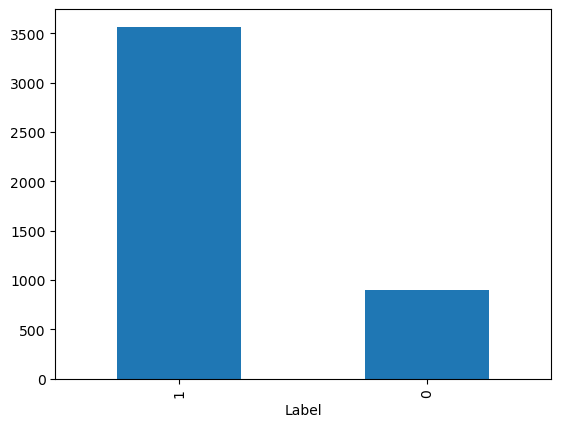

In [7]:
#plt.plot(y1)
pd.Series(y1).value_counts().plot.bar()     #ilosc 1 i 0 klasyfikujacych

In [8]:
#podział danych
X_train, X_test, y_train, y_test = train_test_split(
    X1,
    y1,
    test_size=0.2)

print(X_train.shape)
print(X_test.shape)

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X1,
    y1,
    test_size=0.1)

print(X_train.shape)
print(X_test.shape)

(3572, 241)
(893, 241)
(3572, 241)
(893, 241)


**SMOTE**

<Axes: xlabel='Label'>

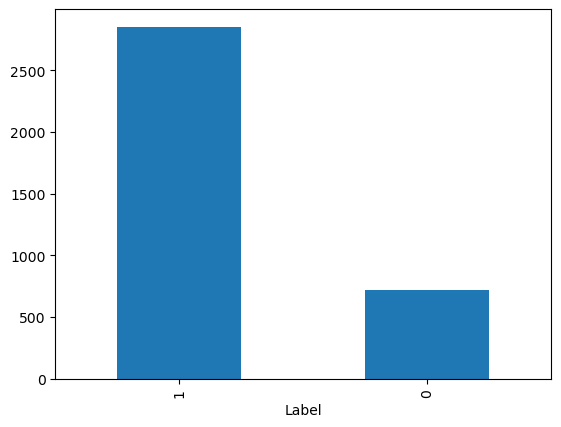

In [9]:
pd.Series(y_train).value_counts().plot.bar()    

In [10]:
con = Counter(y_train)
print('Przed',con)
smote = SMOTE()
X_train_sm, y_train_sm = smote.fit_resample(X_train,y_train)
con1 = Counter(y_train_sm)
print('Po', con1)

Przed Counter({1: 2852, 0: 720})
Po Counter({1: 2852, 0: 2852})


In [11]:
model = XGBRFClassifier(n_estimators=100, max_depth=100)        #random  forest dla sklasyfikowanych
#model1a = XGBRFClassifier(n_estimators=100, max_depth=200)      #random forest dla sklasyfikowanych
model1sm = XGBRFClassifier(n_estimator=100, max_depth=100)      #random forest dla smote
#model2 = DecisionTreeClassifier(max_depth=3, random_state=42)           #drzewa decyzyjne
#model3 = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train,y_train)
#model1a.fit(X_train,y_train)
model1sm.fit(X_train_sm,y_train_sm)
#model2.fit(X_train,y_train)
#model3.fit(X_train,y_train)

c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\xgboost\core.py:158: UserWarning: [15:31:27] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=100, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimator=100, n_estimators=None,
                n_jobs=None, num_parallel_tree=None,
                objective='binary:logistic', random_state=None, ...)

Markery:
Accuracy – Accuracy jest użyteczna, gdy klasy są zrównoważone. W przypadku niezrównoważonych danych może być jednak myląca, ponieważ model może osiągnąć wysoką dokładność, pomijając mniejszościowe klasy.
Recall –  Wysoki recall oznacza, że model dobrze wykrywa wszystkie rzeczywiste pozytywne przypadki i rzadko pomija rzeczywiste przypadki pozytywne.
Precision – Wysoka precyzja oznacza, że model rzadko daje fałszywe alarmy (czyli błędnie klasyfikuje negatywne przypadki jako pozytywne).
F1 score - F1-score jest wysoki, gdy zarówno precision, jak i recall są wysokie. Jest to dobra metryka, gdy ważne jest, aby balansować dokładność z wykrywalnością pozytywnych przypadków.
Micro avg - Micro average traktuje wszystkie klasy tak samo i jest odpowiednia, gdy chcesz dać taki sam priorytet każdemu przypadkowi, bez względu na jego klasę.
Weighted avg - Weighted average jest przydatna, gdy dane są niezrównoważone, ponieważ uwzględnia liczbę przypadków każdej klasy. Daje lepsze ogólne zrozumienie wydajności modelu na zestawach danych z nierównomiernym rozkładem klas.


In [13]:
#RF dla niezbalansowanych
y_pred = model.predict(X_test)
print('RF dla niezbalansowanych', classification_report(y_test, y_pred))
#RF dla zbalansowanych
y_pred1sm = model1sm.predict(X_test)
print('RF dla zbalansowanych',classification_report(y_test, y_pred1sm))
#RF dla niezbalansowanych inne parametry uczenia
#y_pred1a = model1a.predict(X_test1)
#print('RF dla niezbalansowanych inne parametry uczenia',classification_report(y_test1, y_pred1a))
#DT dla niezbalansowanych
#y_pred2 = model2.predict(X_test)
#print('DT dla niezbalansowanych',classification_report(y_test, y_pred2))

RF dla niezbalansowanych               precision    recall  f1-score   support

           0       0.95      0.94      0.95       180
           1       0.99      0.99      0.99       713

    accuracy                           0.98       893
   macro avg       0.97      0.97      0.97       893
weighted avg       0.98      0.98      0.98       893

RF dla zbalansowanych               precision    recall  f1-score   support

           0       0.93      0.97      0.95       180
           1       0.99      0.98      0.99       713

    accuracy                           0.98       893
   macro avg       0.96      0.98      0.97       893
weighted avg       0.98      0.98      0.98       893



In [ ]:
y_pred1a = model1a.predict(X_test1)
print(classification_report(y_test1, y_pred1a))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        96
           1       0.99      1.00      0.99       351

    accuracy                           0.99       447
   macro avg       0.99      0.98      0.99       447
weighted avg       0.99      0.99      0.99       447



In [ ]:
y_pred1sm = model1sm.predict(X_test)
print(classification_report(y_test, y_pred1sm))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       171
           1       1.00      0.99      1.00       722

    accuracy                           0.99       893
   macro avg       0.99      0.99      0.99       893
weighted avg       0.99      0.99      0.99       893



In [ ]:
y_pred2 = model2.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91       171
           1       0.97      0.99      0.98       722

    accuracy                           0.97       893
   macro avg       0.97      0.92      0.94       893
weighted avg       0.97      0.97      0.97       893

